In [1]:
import numpy as np

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


Define el conjunto de datos XOR (operador lógico):
Solo es 1 cuando las entradas son diferentes.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Crea una red neuronal simple:

1 capa oculta con 4 neuronas y activación ReLU.

1 capa de salida con sigmoid, que da una salida entre 0 y 1.

In [3]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


Usa el optimizador Adam, que ajusta los pesos de forma eficiente con una tasa de aprendizaje de 0.01.

In [4]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Prepara el modelo para entrenar:

binary_crossentropy: mide el error para clasificación binaria.

accuracy: evalúa el porcentaje de aciertos.

In [5]:
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)


Entrena el modelo 50 veces sobre los datos XOR, ajustando los pesos para minimizar el error.

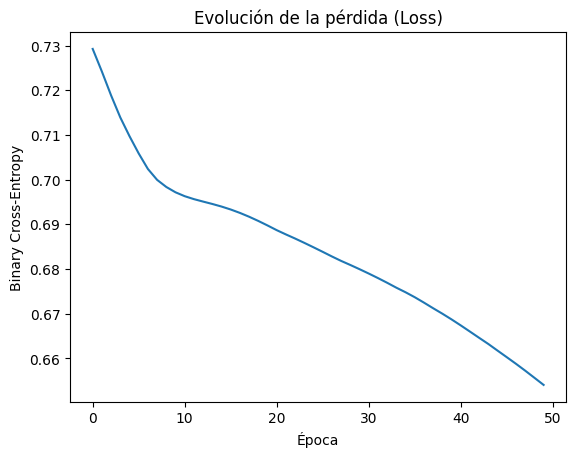

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

Muestra cómo disminuye el error (loss) durante las épocas; una curva descendente indica buen aprendizaje.

In [7]:
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7500 - loss: 0.6524
Loss: 0.6524253487586975, Accuracy: 0.75


Calcula la pérdida y precisión final sobre los datos del XOR.

In [8]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[0 0] -> 0
[0 1] -> 0
[1 0] -> 1
[1 1] -> 0


Predice los resultados del modelo.
Muestra cómo para cada entrada ([0,0], [0,1], etc.) la red devuelve 0 o 1, resolviendo correctamente el problema XOR.